In [1]:
# Importing Necessary Modules
# md traj can be installed via conda easily.
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import os



In [2]:
# Load in trajectory (note I used CPPTRAJ to first combine and strip the trajectories of the water)
original_3W5A = md.load('3W5A_original_strip_50.nc',top = '3W5A_original_strip_top.parm7')
# Use selection criteria to find the atom indices of the regions of the domain that we care about
IM_domain_inds = original_3W5A.top.select('resid 40 to 125 or resid 740 to 991 or resid 240 to 340')
A_domain_inds = original_3W5A.top.select('resid 0 to 40 or resid 125 to 240')
P_domain_inds = original_3W5A.top.select('resid 600 to 740 or resid 340 to 355')
N_domain_inds = original_3W5A.top.select('resid 355 to 600')

# Create a copy of the trajectory using only the specified indicies
IM_domain = original_3W5A.atom_slice(IM_domain_inds, inplace = False)
A_domain = original_3W5A.atom_slice(A_domain_inds, inplace = False)
P_domain = original_3W5A.atom_slice(P_domain_inds, inplace = False)
N_domain = original_3W5A.atom_slice(N_domain_inds, inplace = False)

# Compute the center of mass of the specified domains and calculate the euclidian distance between the centers of mass.
original_A_N_dist = np.linalg.norm(md.compute_center_of_mass(A_domain) - md.compute_center_of_mass(N_domain), axis  = 1)
original_A_P_dist = np.linalg.norm(md.compute_center_of_mass(A_domain) - md.compute_center_of_mass(P_domain), axis  = 1)
original_N_P_dist = np.linalg.norm(md.compute_center_of_mass(N_domain) - md.compute_center_of_mass(P_domain), axis  = 1)

In [3]:
# Load in trajectory (note I used CPPTRAJ to first combine and strip the trajectories of the water)
human_3W5A = md.load('3W5A_human_strip_50.nc',top = '3W5A_human_strip_top.parm7')
# Use selection criteria to find the atom indices of the regions of the domain that we care about
IM_domain_inds = human_3W5A.top.select('resid 40 to 125 or resid 740 to 991 or resid 240 to 340')
A_domain_inds = human_3W5A.top.select('resid 0 to 40 or resid 125 to 240')
P_domain_inds = human_3W5A.top.select('resid 600 to 740 or resid 340 to 355')
N_domain_inds = human_3W5A.top.select('resid 355 to 600')

# Create a copy of the trajectory using only the specified indicies
IM_domain = human_3W5A.atom_slice(IM_domain_inds, inplace = False)
A_domain = human_3W5A.atom_slice(A_domain_inds, inplace = False)
P_domain = human_3W5A.atom_slice(P_domain_inds, inplace = False)
N_domain = human_3W5A.atom_slice(N_domain_inds, inplace = False)

# Compute the center of mass of the specified domains and calculate the euclidian distance between the centers of mass.
human_A_N_dist = np.linalg.norm(md.compute_center_of_mass(A_domain) - md.compute_center_of_mass(N_domain), axis  = 1)
human_A_P_dist = np.linalg.norm(md.compute_center_of_mass(A_domain) - md.compute_center_of_mass(P_domain), axis  = 1)
human_N_P_dist = np.linalg.norm(md.compute_center_of_mass(N_domain) - md.compute_center_of_mass(P_domain), axis  = 1)

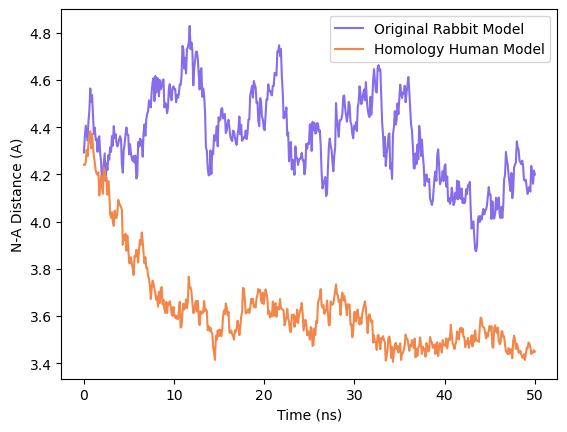

In [4]:
# Plot Results
plt.plot(np.linspace(0,50,500), original_A_N_dist, label = 'Original Rabbit Model', color = [0.529, 0.429, 0.922])
plt.plot(np.linspace(0,50,500), human_A_N_dist, label = 'Homology Human Model', color = [0.952, 0.524, 0.286])
plt.xlabel('Time (ns)')
plt.ylabel('N-A Distance (A)')
plt.legend()

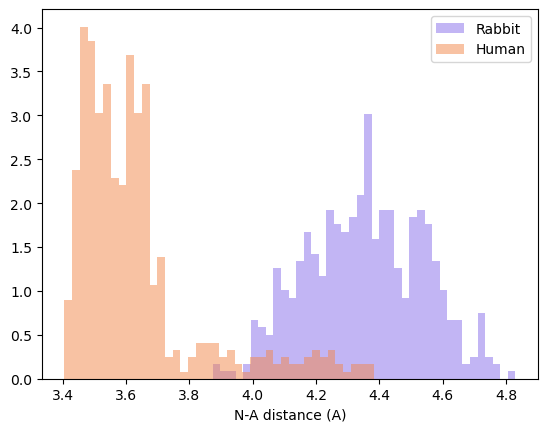

In [5]:
plt.hist(original_A_N_dist, bins = 40, alpha = 0.5, density = True, label = 'Rabbit', color = [0.529, 0.429, 0.922])
plt.hist(human_A_N_dist, bins = 40, alpha = 0.5, density = True, label = 'Human', color = [0.952, 0.524, 0.286])
plt.legend()
plt.xlabel('N-A distance (A)')
plt.show()


In [6]:
# Calculate the RMSF for the alpha carbon atoms
orig_rmsf = md.rmsf(original_3W5A, original_3W5A, frame = 0, atom_indices=original_3W5A.top.select('name CA'))
hum_rmsf = md.rmsf(human_3W5A,human_3W5A, atom_indices=human_3W5A.top.select('name CA'))


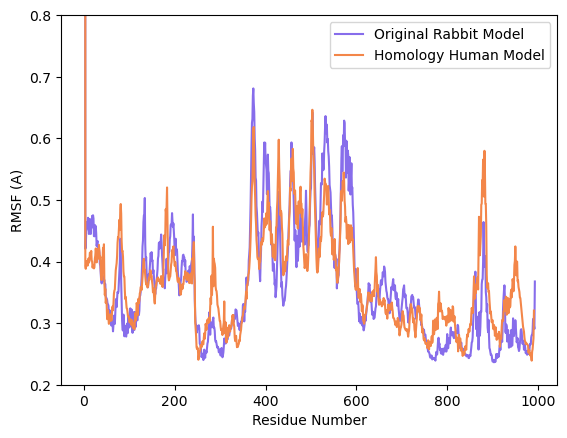

In [7]:
plt.plot(orig_rmsf, label = 'Original Rabbit Model', color = [0.529, 0.429, 0.922])
plt.plot(hum_rmsf, label = 'Homology Human Model', color = [0.952, 0.524, 0.286])
plt.legend()
plt.xlabel('Residue Number')
plt.ylim((0.2,0.8))
plt.ylabel('RMSF (A)')
plt.savefig('RMSF_comp.svg')

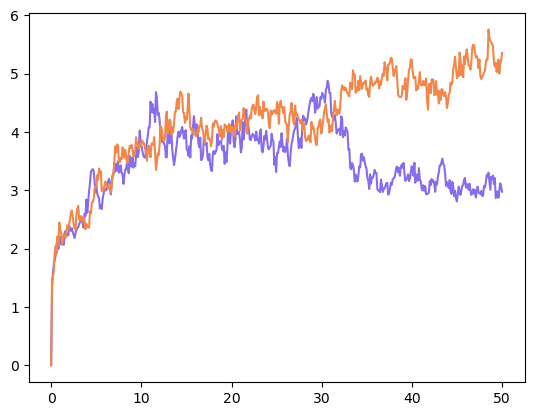

In [8]:
## RMSD Calculations

original_rmsd = md.rmsd(original_3W5A,
                     original_3W5A,
                     frame=0,
                     atom_indices=original_3W5A.top.select('protein'))


plt.plot(np.linspace(0,50,500), original_rmsd*10, label = 'Rabbit', color = [0.529, 0.429, 0.922])

human_rmsd = md.rmsd(human_3W5A,
                     human_3W5A,
                     frame=0,
                     atom_indices=human_3W5A.top.select('protein'))


plt.plot(np.linspace(0,50,500), human_rmsd*10, label = 'Human', color = [0.952, 0.524, 0.286])




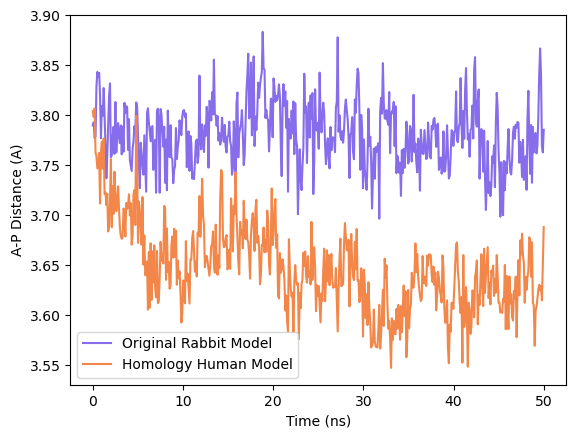

In [9]:
# Plot Results
plt.plot(np.linspace(0,50,500), original_A_P_dist, label = 'Original Rabbit Model', color = [0.529, 0.429, 0.922])
plt.plot(np.linspace(0,50,500), human_A_P_dist, label = 'Homology Human Model', color = [0.952, 0.524, 0.286])
plt.xlabel('Time (ns)')
plt.ylabel('A-P Distance (A)')
plt.legend()

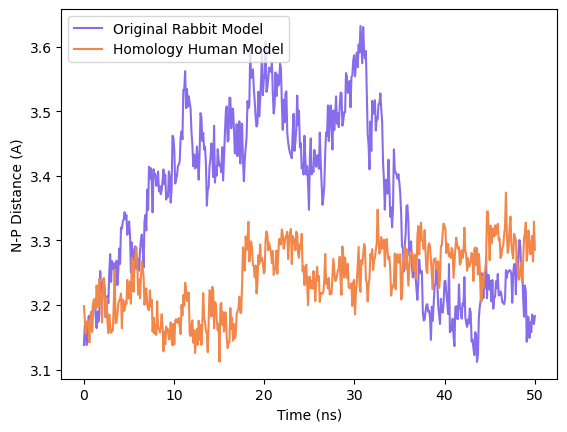

In [10]:
# Plot Results
plt.plot(np.linspace(0,50,500), original_N_P_dist, label = 'Original Rabbit Model', color = [0.529, 0.429, 0.922])
plt.plot(np.linspace(0,50,500), human_N_P_dist, label = 'Homology Human Model', color = [0.952, 0.524, 0.286])
plt.xlabel('Time (ns)')
plt.ylabel('N-P Distance (A)')
plt.legend()

In [16]:
# Load in trajectory (note I used CPPTRAJ to first combine and strip the trajectories of the water)
ATP_3W5A = md.load('3W5A_ATP_original_strip_50.nc',top = '3W5A_ATP_original_strip_top.parm7')
# Use selection criteria to find the atom indices of the regions of the domain that we care about
IM_domain_inds = ATP_3W5A.top.select('resid 40 to 125 or resid 740 to 991 or resid 240 to 340')
A_domain_inds = ATP_3W5A.top.select('resid 0 to 40 or resid 125 to 240')
P_domain_inds = ATP_3W5A.top.select('resid 600 to 740 or resid 340 to 355')
N_domain_inds = ATP_3W5A.top.select('resid 355 to 600')

# Create a copy of the trajectory using only the specified indicies
IM_domain = ATP_3W5A.atom_slice(IM_domain_inds, inplace = False)
A_domain = ATP_3W5A.atom_slice(A_domain_inds, inplace = False)
P_domain = ATP_3W5A.atom_slice(P_domain_inds, inplace = False)
N_domain = ATP_3W5A.atom_slice(N_domain_inds, inplace = False)

# Compute the center of mass of the specified domains and calculate the euclidian distance between the centers of mass.
ATP_A_N_dist = np.linalg.norm(md.compute_center_of_mass(A_domain) - md.compute_center_of_mass(N_domain), axis  = 1)
ATP_A_P_dist = np.linalg.norm(md.compute_center_of_mass(A_domain) - md.compute_center_of_mass(P_domain), axis  = 1)
ATP_N_P_dist = np.linalg.norm(md.compute_center_of_mass(N_domain) - md.compute_center_of_mass(P_domain), axis  = 1)

In [17]:
# Load in trajectory (note I used CPPTRAJ to first combine and strip the trajectories of the water)
dATP_3W5A = md.load('3W5A_dATP_original_2_strip_50.nc',top = '3W5A_dATP_original_2_strip_top.parm7')
# Use selection criteria to find the atom indices of the regions of the domain that we care about
IM_domain_inds = dATP_3W5A.top.select('resid 40 to 125 or resid 740 to 991 or resid 240 to 340')
A_domain_inds = dATP_3W5A.top.select('resid 0 to 40 or resid 125 to 240')
P_domain_inds = dATP_3W5A.top.select('resid 600 to 740 or resid 340 to 355')
N_domain_inds = dATP_3W5A.top.select('resid 355 to 600')

# Create a copy of the trajectory using only the specified indicies
IM_domain = dATP_3W5A.atom_slice(IM_domain_inds, inplace = False)
A_domain = dATP_3W5A.atom_slice(A_domain_inds, inplace = False)
P_domain = dATP_3W5A.atom_slice(P_domain_inds, inplace = False)
N_domain = dATP_3W5A.atom_slice(N_domain_inds, inplace = False)

# Compute the center of mass of the specified domains and calculate the euclidian distance between the centers of mass.
dATP_A_N_dist = np.linalg.norm(md.compute_center_of_mass(A_domain) - md.compute_center_of_mass(N_domain), axis  = 1)
dATP_A_P_dist = np.linalg.norm(md.compute_center_of_mass(A_domain) - md.compute_center_of_mass(P_domain), axis  = 1)
dATP_N_P_dist = np.linalg.norm(md.compute_center_of_mass(N_domain) - md.compute_center_of_mass(P_domain), axis  = 1)

Text(0, 0.5, 'A-N Distance (A)')

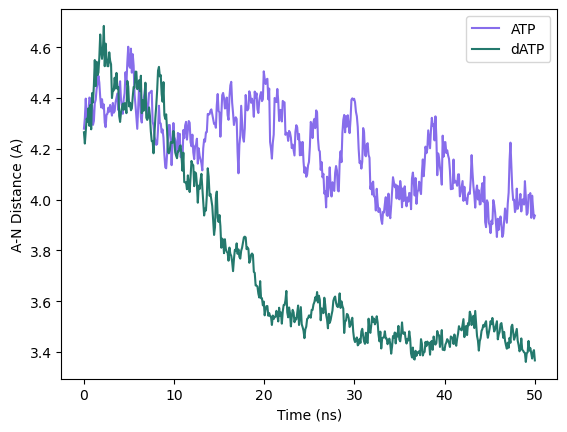

In [18]:
# Plot Results
plt.plot(np.linspace(0,50,500), ATP_A_N_dist, label = 'ATP', color = [0.529, 0.429, 0.922])
plt.plot(np.linspace(0,50,500), dATP_A_N_dist, label = 'dATP', color = [0.143, 0.476, 0.429])
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('A-N Distance (A)')

Text(0, 0.5, 'A-P Distance (A)')

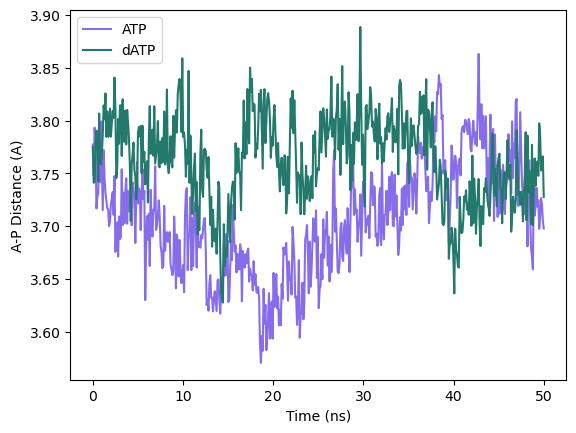

In [19]:
# Plot Results
plt.plot(np.linspace(0,50,500), ATP_A_P_dist, label = 'ATP', color = [0.529, 0.429, 0.922])
plt.plot(np.linspace(0,50,500), dATP_A_P_dist, label = 'dATP', color = [0.143, 0.476, 0.429])
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('A-P Distance (A)')

Text(0, 0.5, 'N-P Distance (A)')

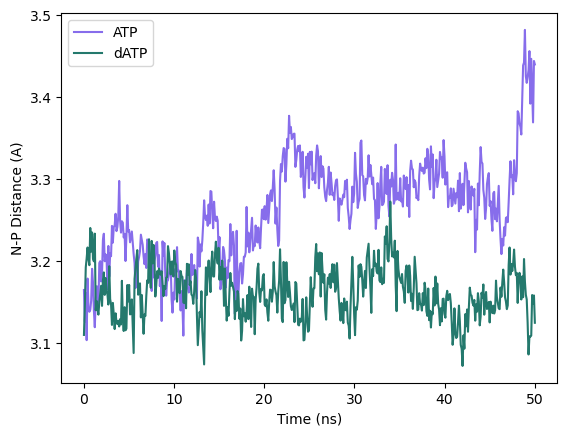

In [20]:
# Plot Results
plt.plot(np.linspace(0,50,500), ATP_N_P_dist, label = 'ATP', color = [0.529, 0.429, 0.922])
plt.plot(np.linspace(0,50,500), dATP_N_P_dist, label = 'dATP', color = [0.143, 0.476, 0.429])
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('N-P Distance (A)')

In [24]:
# Find distances between ATP and important residues
ATP = ATP_3W5A.top.select('resname ATP')
res_560_ATP = ATP_3W5A.top.select('resid 560')
res_626_ATP = ATP_3W5A.top.select('resid 626')
res_627_ATP = ATP_3W5A.top.select('resid 627')
res_352_ATP = ATP_3W5A.top.select('resid 352')
res_353_ATP = ATP_3W5A.top.select('resid 353')
res_487_ATP = ATP_3W5A.top.select('resid 487')
res_515_ATP = ATP_3W5A.top.select('resid 515')

dATP = dATP_3W5A.top.select('resname DAT')
res_560_dATP = dATP_3W5A.top.select('resid 560')
res_626_dATP = dATP_3W5A.top.select('resid 626')
res_627_dATP = dATP_3W5A.top.select('resid 627')
res_352_dATP = dATP_3W5A.top.select('resid 352')
res_353_dATP = dATP_3W5A.top.select('resid 353')
res_487_dATP = dATP_3W5A.top.select('resid 487')
res_515_dATP = dATP_3W5A.top.select('resid 515')

# Create a copy of the trajectory using only the specified indicies
ATP_slice = ATP_3W5A.atom_slice(ATP, inplace = False)
res_560_slice_ATP = ATP_3W5A.atom_slice(res_560, inplace = False)
res_626_slice_ATP = ATP_3W5A.atom_slice(res_626, inplace = False)
res_627_slice_ATP = ATP_3W5A.atom_slice(res_627, inplace = False)
res_352_slice_ATP = ATP_3W5A.atom_slice(res_352, inplace = False)
res_353_slice_ATP = ATP_3W5A.atom_slice(res_353, inplace = False)
res_487_slice_ATP = ATP_3W5A.atom_slice(res_487, inplace = False)
res_515_slice_ATP = ATP_3W5A.atom_slice(res_515, inplace = False)

dATP_slice = dATP_3W5A.atom_slice(dATP, inplace = False)
res_560_slice_dATP = dATP_3W5A.atom_slice(res_560, inplace = False)
res_626_slice_dATP = dATP_3W5A.atom_slice(res_626, inplace = False)
res_627_slice_dATP = dATP_3W5A.atom_slice(res_627, inplace = False)
res_352_slice_dATP = dATP_3W5A.atom_slice(res_352, inplace = False)
res_353_slice_dATP = dATP_3W5A.atom_slice(res_353, inplace = False)
res_487_slice_dATP = dATP_3W5A.atom_slice(res_487, inplace = False)
res_515_slice_dATP = dATP_3W5A.atom_slice(res_515, inplace = False)

# Compute the center of mass of the specified domains and calculate the euclidian distance between the centers of mass.
ATP_560_dist = np.linalg.norm(md.compute_center_of_mass(ATP_slice) - md.compute_center_of_mass(res_560_slice_ATP), axis  = 1)
ATP_626_dist = np.linalg.norm(md.compute_center_of_mass(ATP_slice) - md.compute_center_of_mass(res_626_slice_ATP), axis  = 1)
ATP_627_dist = np.linalg.norm(md.compute_center_of_mass(ATP_slice) - md.compute_center_of_mass(res_627_slice_ATP), axis  = 1)
ATP_352_dist = np.linalg.norm(md.compute_center_of_mass(ATP_slice) - md.compute_center_of_mass(res_352_slice_ATP), axis  = 1)
ATP_353_dist = np.linalg.norm(md.compute_center_of_mass(ATP_slice) - md.compute_center_of_mass(res_353_slice_ATP), axis  = 1)
ATP_487_dist = np.linalg.norm(md.compute_center_of_mass(ATP_slice) - md.compute_center_of_mass(res_487_slice_ATP), axis  = 1)
ATP_515_dist = np.linalg.norm(md.compute_center_of_mass(ATP_slice) - md.compute_center_of_mass(res_515_slice_ATP), axis  = 1)

dATP_560_dist = np.linalg.norm(md.compute_center_of_mass(dATP_slice) - md.compute_center_of_mass(res_560_slice_dATP), axis  = 1)
dATP_626_dist = np.linalg.norm(md.compute_center_of_mass(dATP_slice) - md.compute_center_of_mass(res_626_slice_dATP), axis  = 1)
dATP_627_dist = np.linalg.norm(md.compute_center_of_mass(dATP_slice) - md.compute_center_of_mass(res_627_slice_dATP), axis  = 1)
dATP_352_dist = np.linalg.norm(md.compute_center_of_mass(dATP_slice) - md.compute_center_of_mass(res_352_slice_dATP), axis  = 1)
dATP_353_dist = np.linalg.norm(md.compute_center_of_mass(dATP_slice) - md.compute_center_of_mass(res_353_slice_dATP), axis  = 1)
dATP_487_dist = np.linalg.norm(md.compute_center_of_mass(dATP_slice) - md.compute_center_of_mass(res_487_slice_dATP), axis  = 1)
dATP_515_dist = np.linalg.norm(md.compute_center_of_mass(dATP_slice) - md.compute_center_of_mass(res_515_slice_dATP), axis  = 1)


Text(0, 0.5, '(d)ATP-ARG 560 Distance (A)')

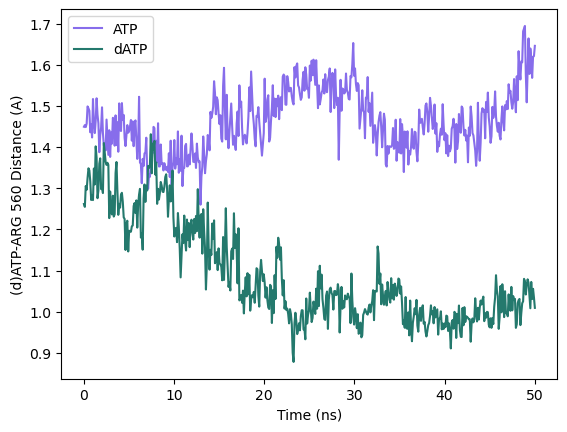

In [25]:
# Plot Results
plt.plot(np.linspace(0,50,500), ATP_560_dist, label = 'ATP', color = [0.529, 0.429, 0.922])
plt.plot(np.linspace(0,50,500), dATP_560_dist, label = 'dATP', color = [0.143, 0.476, 0.429])
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('(d)ATP-ARG 560 Distance (A)')

Text(0, 0.5, '(d)ATP-Gly 626 Distance (A)')

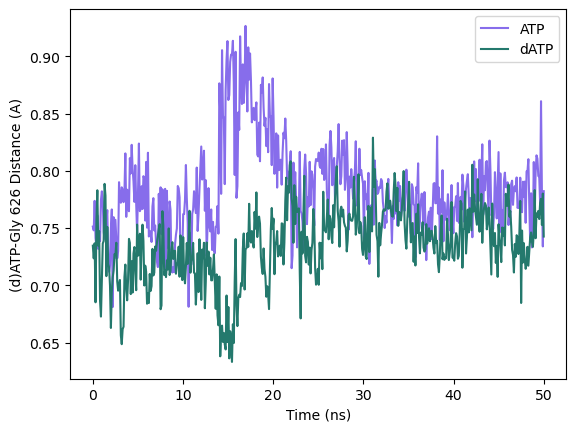

In [26]:
# Plot Results
plt.plot(np.linspace(0,50,500), ATP_626_dist, label = 'ATP', color = [0.529, 0.429, 0.922])
plt.plot(np.linspace(0,50,500), dATP_626_dist, label = 'dATP', color = [0.143, 0.476, 0.429])
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('(d)ATP-Gly 626 Distance (A)')

Text(0, 0.5, '(d)ATP-Asp 627 Distance (A)')

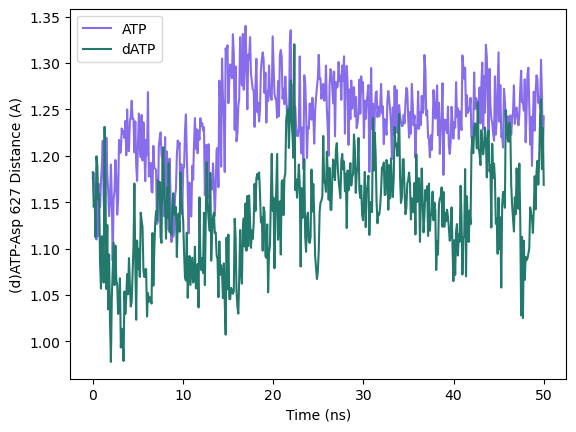

In [27]:
# Plot Results
plt.plot(np.linspace(0,50,500), ATP_627_dist, label = 'ATP', color = [0.529, 0.429, 0.922])
plt.plot(np.linspace(0,50,500), dATP_627_dist, label = 'dATP', color = [0.143, 0.476, 0.429])
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('(d)ATP-Asp 627 Distance (A)')

Text(0, 0.5, '(d)ATP-LYS 352 Distance (A)')

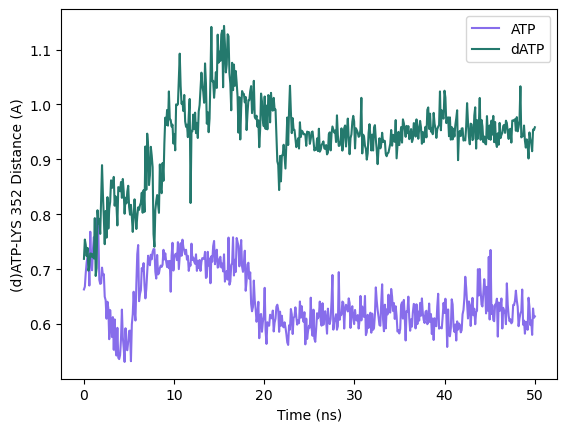

In [28]:
# Plot Results
plt.plot(np.linspace(0,50,500), ATP_352_dist, label = 'ATP', color = [0.529, 0.429, 0.922])
plt.plot(np.linspace(0,50,500), dATP_352_dist, label = 'dATP', color = [0.143, 0.476, 0.429])
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('(d)ATP-LYS 352 Distance (A)')

Text(0, 0.5, '(d)ATP-THR 353 Distance (A)')

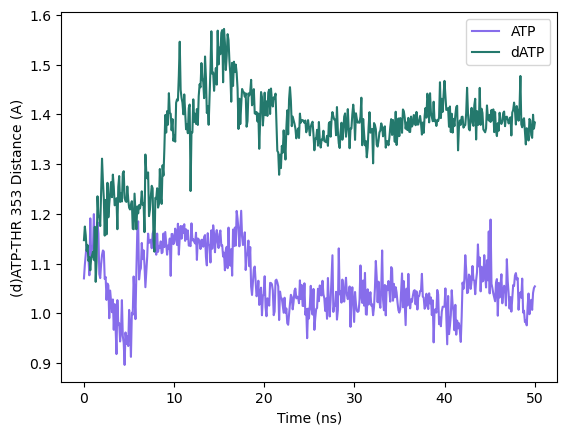

In [29]:
# Plot Results
plt.plot(np.linspace(0,50,500), ATP_353_dist, label = 'ATP', color = [0.529, 0.429, 0.922])
plt.plot(np.linspace(0,50,500), dATP_353_dist, label = 'dATP', color = [0.143, 0.476, 0.429])
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('(d)ATP-THR 353 Distance (A)')

Text(0, 0.5, '(d)ATP-PHE 487 Distance (A)')

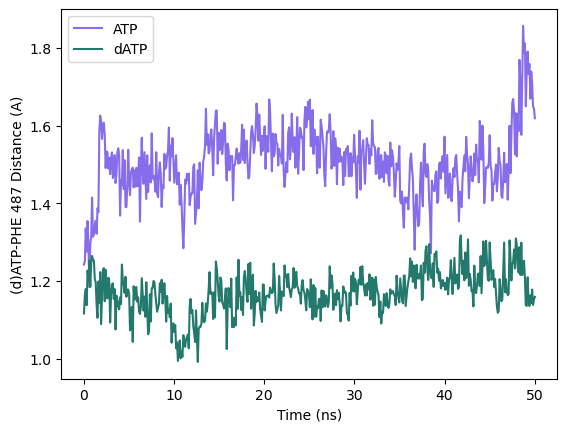

In [30]:
# Plot Results
plt.plot(np.linspace(0,50,500), ATP_487_dist, label = 'ATP', color = [0.529, 0.429, 0.922])
plt.plot(np.linspace(0,50,500), dATP_487_dist, label = 'dATP', color = [0.143, 0.476, 0.429])
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('(d)ATP-PHE 487 Distance (A)')

Text(0, 0.5, '(d)ATP-LYS 515 Distance (A)')

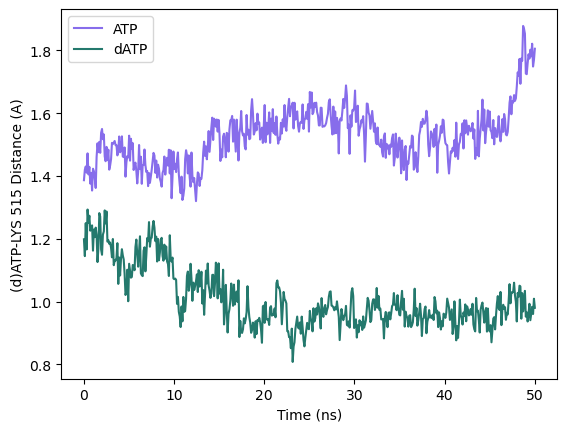

In [31]:
# Plot Results
plt.plot(np.linspace(0,50,500), ATP_515_dist, label = 'ATP', color = [0.529, 0.429, 0.922])
plt.plot(np.linspace(0,50,500), dATP_515_dist, label = 'dATP', color = [0.143, 0.476, 0.429])
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('(d)ATP-LYS 515 Distance (A)')

In [36]:
#Find distances between TM helices
Helix_1_inds_ATP = ATP_3W5A.top.select('resid 49 to 75')
Helix_2_inds_ATP = ATP_3W5A.top.select('resid 86 to 122')
Helix_3_inds_ATP = ATP_3W5A.top.select('resid 248 to 278')
Helix_4_inds_ATP = ATP_3W5A.top.select('resid 288 to 329')
Helix_5_inds_ATP = ATP_3W5A.top.select('resid 740 to 781')
Helix_6_inds_ATP = ATP_3W5A.top.select('resid 789 to 809')
Helix_7_inds_ATP = ATP_3W5A.top.select('resid 831 to 857')
Helix_8_inds_ATP = ATP_3W5A.top.select('resid 888 to 916')
Helix_9_inds_ATP = ATP_3W5A.top.select('resid 927 to 948')
Helix_10_inds_ATP = ATP_3W5A.top.select('resid 964 to 990')

Helix_1_inds_dATP = dATP_3W5A.top.select('resid 49 to 75')
Helix_2_inds_dATP = dATP_3W5A.top.select('resid 86 to 122')
Helix_3_inds_dATP = dATP_3W5A.top.select('resid 248 to 278')
Helix_4_inds_dATP = dATP_3W5A.top.select('resid 288 to 329')
Helix_5_inds_dATP = dATP_3W5A.top.select('resid 740 to 781')
Helix_6_inds_dATP = dATP_3W5A.top.select('resid 789 to 809')
Helix_7_inds_dATP = dATP_3W5A.top.select('resid 831 to 857')
Helix_8_inds_dATP = dATP_3W5A.top.select('resid 888 to 916')
Helix_9_inds_dATP = dATP_3W5A.top.select('resid 927 to 948')
Helix_10_inds_dATP = dATP_3W5A.top.select('resid 964 to 990')

# Create a copy of the trajectory using only the specified indicies
Helix_1_ATP = ATP_3W5A.atom_slice(Helix_1_inds_ATP, inplace = False)
Helix_2_ATP = ATP_3W5A.atom_slice(Helix_2_inds_ATP, inplace = False)
Helix_3_ATP = ATP_3W5A.atom_slice(Helix_3_inds_ATP, inplace = False)
Helix_4_ATP = ATP_3W5A.atom_slice(Helix_4_inds_ATP, inplace = False)
Helix_5_ATP = ATP_3W5A.atom_slice(Helix_5_inds_ATP, inplace = False)
Helix_6_ATP = ATP_3W5A.atom_slice(Helix_6_inds_ATP, inplace = False)
Helix_7_ATP = ATP_3W5A.atom_slice(Helix_7_inds_ATP, inplace = False)
Helix_8_ATP = ATP_3W5A.atom_slice(Helix_8_inds_ATP, inplace = False)
Helix_9_ATP = ATP_3W5A.atom_slice(Helix_9_inds_ATP, inplace = False)
Helix_10_ATP = ATP_3W5A.atom_slice(Helix_10_inds_ATP, inplace = False)

Helix_1_dATP = dATP_3W5A.atom_slice(Helix_1_inds_dATP, inplace = False)
Helix_2_dATP = dATP_3W5A.atom_slice(Helix_2_inds_dATP, inplace = False)
Helix_3_dATP = dATP_3W5A.atom_slice(Helix_3_inds_dATP, inplace = False)
Helix_4_dATP = dATP_3W5A.atom_slice(Helix_4_inds_dATP, inplace = False)
Helix_5_dATP = dATP_3W5A.atom_slice(Helix_5_inds_dATP, inplace = False)
Helix_6_dATP = dATP_3W5A.atom_slice(Helix_6_inds_dATP, inplace = False)
Helix_7_dATP = dATP_3W5A.atom_slice(Helix_7_inds_dATP, inplace = False)
Helix_8_dATP = dATP_3W5A.atom_slice(Helix_8_inds_dATP, inplace = False)
Helix_9_dATP = dATP_3W5A.atom_slice(Helix_9_inds_dATP, inplace = False)
Helix_10_dATP = dATP_3W5A.atom_slice(Helix_10_inds_dATP, inplace = False)

# Compute the center of mass of the specified domains and calculate the euclidian distance between the centers of mass.
ATP_5_6_dist = np.linalg.norm(md.compute_center_of_mass(Helix_5_ATP) - md.compute_center_of_mass(Helix_6_ATP), axis  = 1)
ATP_5_8_dist = np.linalg.norm(md.compute_center_of_mass(Helix_5_ATP) - md.compute_center_of_mass(Helix_8_ATP), axis  = 1)
ATP_6_8_dist = np.linalg.norm(md.compute_center_of_mass(Helix_6_ATP) - md.compute_center_of_mass(Helix_8_ATP), axis  = 1)

dATP_5_6_dist = np.linalg.norm(md.compute_center_of_mass(Helix_5_dATP) - md.compute_center_of_mass(Helix_6_dATP), axis  = 1)
dATP_5_8_dist = np.linalg.norm(md.compute_center_of_mass(Helix_5_dATP) - md.compute_center_of_mass(Helix_8_dATP), axis  = 1)
dATP_6_8_dist = np.linalg.norm(md.compute_center_of_mass(Helix_6_dATP) - md.compute_center_of_mass(Helix_8_dATP), axis  = 1)


Text(0, 0.5, 'TM5-TM6 Distance (A)')

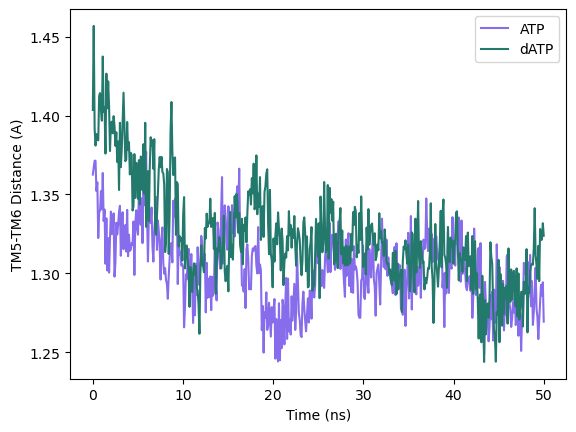

In [37]:
# Plot Results
plt.plot(np.linspace(0,50,500), ATP_5_6_dist, label = 'ATP', color = [0.529, 0.429, 0.922])
plt.plot(np.linspace(0,50,500), dATP_5_6_dist, label = 'dATP', color = [0.143, 0.476, 0.429])
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('TM5-TM6 Distance (A)')

Text(0, 0.5, 'TM5-TM8 Distance (A)')

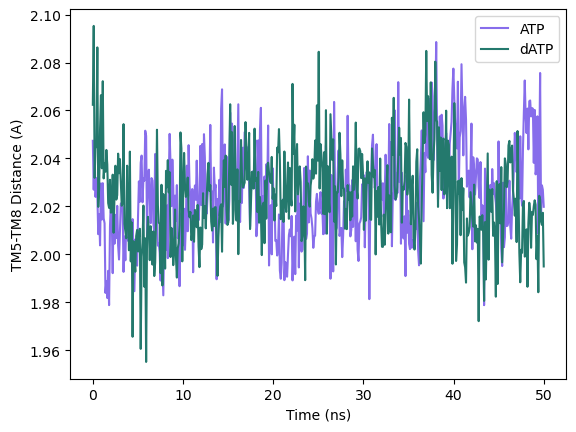

In [38]:
# Plot Results
plt.plot(np.linspace(0,50,500), ATP_5_8_dist, label = 'ATP', color = [0.529, 0.429, 0.922])
plt.plot(np.linspace(0,50,500), dATP_5_8_dist, label = 'dATP', color = [0.143, 0.476, 0.429])
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('TM5-TM8 Distance (A)')

Text(0, 0.5, 'TM6-TM8 Distance (A)')

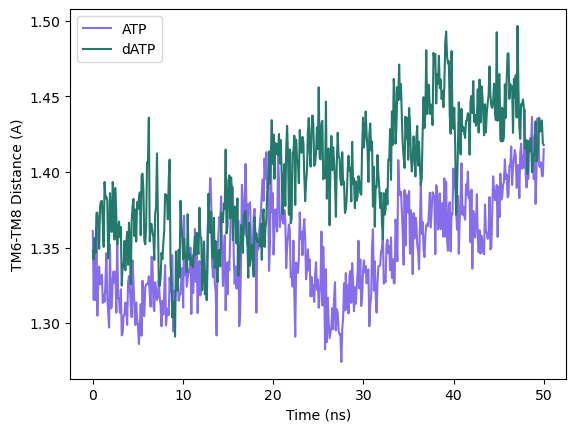

In [39]:
# Plot Results
plt.plot(np.linspace(0,50,500), ATP_6_8_dist, label = 'ATP', color = [0.529, 0.429, 0.922])
plt.plot(np.linspace(0,50,500), dATP_6_8_dist, label = 'dATP', color = [0.143, 0.476, 0.429])
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('TM6-TM8 Distance (A)')